# ANALYSIS OF PRIVACY METRICS FOR GENERATED DATA

In [1]:
data_dir = '../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'adult': (data_dir + '/adult', 'adult'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'bitcoin': (data_dir + '/bitcoin', 'bitcoin'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'wine' : (data_dir + '/wine','wine'),
            'boston_housing' : (data_dir + '/boston_housing','boston_housing'),
            'diabetes' : (data_dir + '/diabetes','diabetes'),
            'seeds' : (data_dir + '/seeds','seeds'),
            'sonar' : (data_dir + '/sonar','sonar')}


# Imports
import numpy as np
import matplotlib.pyplot as plt
from sys import path
import pandas as pd

# AutoML and Comparator
main_path = '../../'
path.append(main_path + 'code/auto_ml')
path.append(main_path + 'code/processing')
path.append(main_path + 'code/functions')
path.append(main_path + 'code/models')
path.append(main_path + 'data')
path.append(main_path + 'generators')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from auto_ml import AutoML
from comparator import Comparator


# Generator
from rf_generator import RF_generator

## MDA

In [2]:
def generate_bar_plot_for_different_metrics(original_data,gen_name):    
    dist_metrics=['manhattan', 'euclidean', 'minimum', 'maximum']
    privacy_values=[]
    resemblance_values=[]

    for metric in dist_metrics:
        comparator = Comparator(original_data, AutoML('../../../data', gen_name))
        comparator.compute_mda(norm=metric, precision=0.01, threshold=0.4)
        (_, _), (privacy1, resemblance1), _ = comparator.mda1
        privacy_values.append(privacy1)
        resemblance_values.append(resemblance1)

    fig, ax = plt.subplots()
    ind = np.arange(4)
    width = 0.4
    privacy_bar = ax.bar(ind, privacy_values, width, color='r')
    resemblance_bar = ax.bar(ind+width, resemblance_values, width, color='b')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by Metrics')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(dist_metrics)
    ax.legend((privacy_bar[0], resemblance_bar[0]), ('Privacy', 'Resemblance'))

    def autolabel(bars):
        """
        Attach a text label above each bar displaying its height
        """
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
                    '%.5f' % float(height),
                    ha='center', va='bottom')

    autolabel(privacy_bar)
    autolabel(resemblance_bar)


### IRIS DATASET

The Iris Flowers Dataset involves predicting the flower species given measurements of iris flowers.

It is a multi-class classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

    Sepal length in cm.
    Sepal width in cm.
    Petal length in cm.
    Petal width in cm.
    Class (Iris Setosa, Iris Versicolour, Iris Virginica).


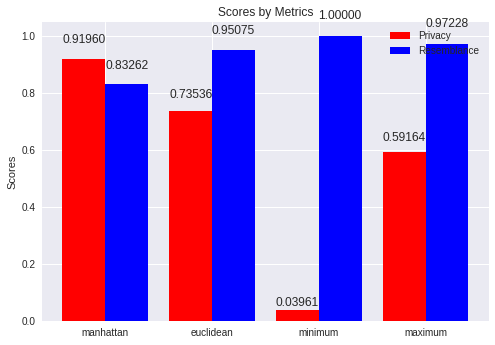

In [3]:
input_dir, basename = datasets['iris']
original_data = AutoML(input_dir, basename)
gen = RF_generator(original_data)
gen.fit()
gen.generate_to_automl("../../../data", "iris_gen", p=1)
generate_bar_plot_for_different_metrics(original_data,'iris_gen')

### BOSTON HOUSING DATASET

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood.

It is a regression problem. The number of observations for each class is balanced. There are 506 observations with 13 input variables and 1 output variable. The variable names are as follows:

    CRIM: per capita crime rate by town.
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of nonretail business acres per town.
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    NOX: nitric oxides concentration (parts per 10 million).
    RM: average number of rooms per dwelling.
    AGE: proportion of owner-occupied units built prior to 1940.
    DIS: weighted distances to five Boston employment centers.
    RAD: index of accessibility to radial highways.
    TAX: full-value property-tax rate per $10,000.
    PTRATIO: pupil-teacher ratio by town.
    B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
    LSTAT: % lower status of the population.
    MEDV: Median value of owner-occupied homes in $1000s.


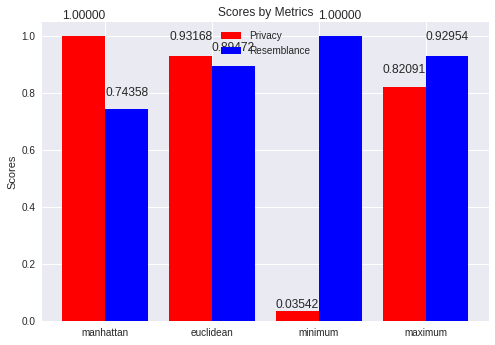

In [4]:
input_dir, basename = datasets['boston_housing']
original_data = AutoML.from_csv(input_dir,basename,'train.csv',seps=[',',','])
gen = RF_generator(original_data)
gen.fit()
gen.generate_to_automl("../../../data", "boston_gen", p=1)
generate_bar_plot_for_different_metrics(original_data,'boston_gen')

### PIMA INDIAN DIABETES DATASET

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).


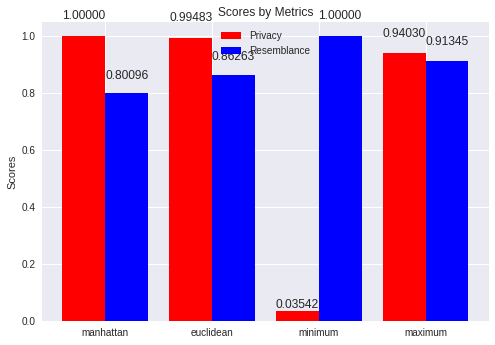

In [5]:
input_dir, basename = datasets['diabetes']
original_data = AutoML.from_csv(input_dir,basename,'diabetes.csv',seps=[',',','])
gen = RF_generator(original_data)
gen.fit()
gen.generate_to_automl("../../../data", "diabetes_gen", p=1)
generate_bar_plot_for_different_metrics(original_data,'diabetes_gen')

### WHEAT SEEDS DATASET

The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a binary (2-class) classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

    Area.
    Perimeter.
    Compactness
    Length of kernel.
    Width of kernel.
    Asymmetry coefficient.
    Length of kernel groove.
    Class (1, 2, 3).


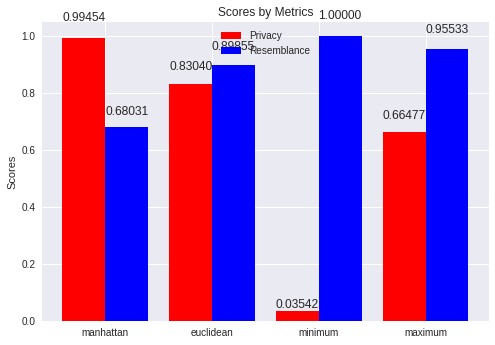

In [6]:
input_dir, basename = datasets['seeds']
original_data = AutoML.from_csv(input_dir,basename,'seeds.csv',seps=[',',','])
gen = RF_generator(original_data)
gen.fit()
gen.generate_to_automl("../../../data", "seeds_gen", p=1)
generate_bar_plot_for_different_metrics(original_data,'seeds_gen')

### WINE DATASET

he Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine.

It is a multi-class classification problem, but could also be framed as a regression problem. The number of observations for each class is not balanced. There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:

    Fixed acidity.
    Volatile acidity.
    Citric acid.
    Residual sugar.
    Chlorides.
    Free sulfur dioxide.
    Total sulfur dioxide.
    Density.
    pH.
    Sulphates.
    Alcohol.
    Quality (score between 0 and 10).


In [ ]:
input_dir, basename = datasets['wine']
original_data = AutoML.from_csv(input_dir,basename,'winequality-white.csv',seps=[';',';'])
gen = RF_generator(original_data)
gen.fit()
gen.generate_to_automl("../../../data", "wine_gen", p=1)
generate_bar_plot_for_different_metrics(original_data,'wine_gen')